In [1]:
import pandas as pd 
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv("Advertising.csv")

In [4]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df.size

1000

In [6]:
df.shape

(200, 5)

In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
df.keys()

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
df=df.drop(['Unnamed: 0'],axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


<AxesSubplot: >

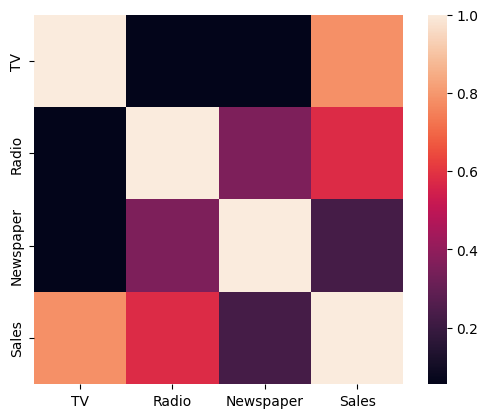

In [11]:
sns.heatmap(df.corr(), square=True)

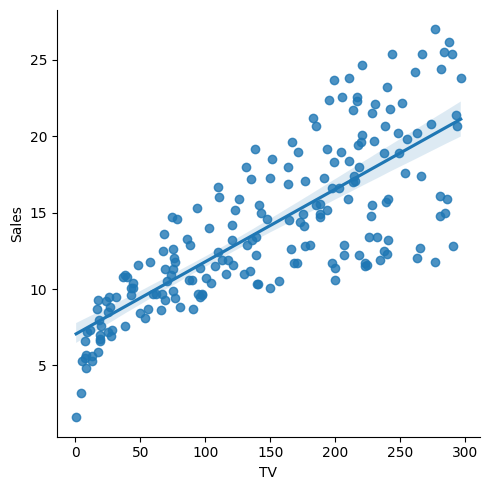

In [12]:
sns.lmplot(x='TV', y='Sales', data=df)

In [13]:
X = df[['TV']]
y = df.Sales

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
print(model.coef_)
print(model.intercept_)

[0.04474675]
7.308260742166187


In [16]:
y_pred = model.predict(X_test)
act_predict= pd.DataFrame({
    'Actual': y_test.values.flatten(), 
    'Predict': y_pred.flatten()})

act_predict.head(12)

,Actual,Predict
0,18.4,16.736402
1,7.2,7.697557
2,18.0,17.080952
3,25.5,19.998440
4,22.6,16.991458
5,14.6,13.899457
6,14.9,15.738549
7,23.7,16.208390
8,22.3,17.009357
9,9.3,8.077905


<AxesSubplot: >

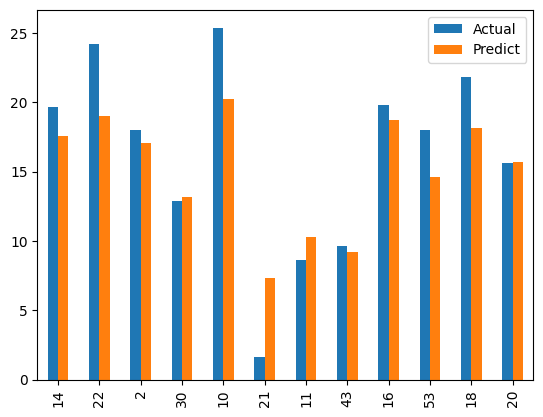

In [17]:
act_predict.sample(12).plot(kind='bar')